# Analyse des données textuelles

In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

#### Importer la base de données

In [3]:
df = pd.read_csv('DF_JOB.csv', sep=';', encoding='cp1252')

In [4]:
df.head(3)

,Unnamed: 0,TITRE,DESCRIPTION,ENTREPRISE,LIEUX
0,1,rpa & data : automatisation des flux de donnée...,description de l'entreprise almond recherche d...,almond,"sèvres, hauts-de-seine"
1,2,data scientist f/h,"l'entreprise leader de son marché, le groupe p...",réseau primever,"agen, lot-et-garonne"
2,3,data engineer sénior (f/h),description de l'entreprise asendit est spécia...,asendit,lyon


####  Nettoyage et préparation de la base de données

In [5]:
del df['Unnamed: 0']

In [6]:
df.head(3)

,TITRE,DESCRIPTION,ENTREPRISE,LIEUX
0,rpa & data : automatisation des flux de donnée...,description de l'entreprise almond recherche d...,almond,"sèvres, hauts-de-seine"
1,data scientist f/h,"l'entreprise leader de son marché, le groupe p...",réseau primever,"agen, lot-et-garonne"
2,data engineer sénior (f/h),description de l'entreprise asendit est spécia...,asendit,lyon


In [7]:
df.shape

(2000, 4)

In [8]:
def func(a):
    if "analyst" in a.lower():
        return "data analyst"
    elif "scientist" in a.lower():
        return "data scientist"
    elif "engineer" in a.lower():
        return "data engineer"
    elif "data science" in a.lower():
        return "data scientist"
    elif "flux" in a.lower():
        return "data flux"
    elif "bi " in a.lower():
        return "bi"
    elif "business intelligence" in a.lower():
        return "bi"
    elif "officer" in a.lower():
        return "data officer"
    elif "architect" in a.lower():
        return "data architect"
    elif "big data" in a.lower():
        return "ingénieur big data"
    elif "consultant" in a.lower():
        return "consultant data"
    elif "manager" in a.lower():
        return "data manager"
    elif "steward" in a.lower():
        return "data steward"
    else:
        return "Other"

df["POSTE"] = df.TITRE.apply(lambda x: func(x))

In [9]:
df.head(3)

,TITRE,DESCRIPTION,ENTREPRISE,LIEUX,POSTE
0,rpa & data : automatisation des flux de donnée...,description de l'entreprise almond recherche d...,almond,"sèvres, hauts-de-seine",data flux
1,data scientist f/h,"l'entreprise leader de son marché, le groupe p...",réseau primever,"agen, lot-et-garonne",data scientist
2,data engineer sénior (f/h),description de l'entreprise asendit est spécia...,asendit,lyon,data engineer


#### Les métiers data recherchés 

In [10]:
df['POSTE'].value_counts()

Other                 547
data analyst          425
data engineer         301
data scientist        248
consultant data       132
data manager          116
data architect         71
ingénieur big data     69
bi                     55
data officer           15
data flux              13
data steward            8
Name: POSTE, dtype: int64

###### Je garde seulement les trois métiers : data analyst, data scientist, data engineer, et uniquement 200 offres par métiers 

In [11]:
value = ["data analyst", "data engineer", "data scientist"]

In [12]:
df02 = df[df.POSTE.isin(value) == True]

In [13]:
df02['POSTE'].value_counts()

data analyst      425
data engineer     301
data scientist    248
Name: POSTE, dtype: int64

In [14]:
analyst = df[df.POSTE == "data analyst"]
engineer = df[df.POSTE == "data engineer"]
scientist = df[df.POSTE == "data scientist"]

#### Supprimer les lignes de plus pour garder 200 lignes

In [15]:
analyst.drop(analyst.head(225).index, inplace=True)
engineer.drop(engineer.head(101).index, inplace=True)
scientist.drop(scientist.head(48).index, inplace=True)

In [16]:
df03 = pd.concat([analyst, scientist, engineer])

In [17]:
df03['POSTE'].value_counts()

data analyst      200
data scientist    200
data engineer     200
Name: POSTE, dtype: int64

#### Préparation des données textuelles de la colonne 'DESCRIPTION'

In [18]:
list_analyst = df03.loc[df['POSTE'] == 'data analyst', 'DESCRIPTION'].values
list_scientist = df03.loc[df['POSTE'] == 'data scientist', 'DESCRIPTION']. values
list_engineer = df03.loc[df['POSTE'] == 'data engineer', 'DESCRIPTION']. values

In [20]:
print(len(list_analyst))
print(len(list_scientist))
print(len(list_engineer))

200
200
200


In [21]:
list_analyst = " ".join(list_analyst)
list_scientist = " ".join(list_scientist)
list_engineer = " ".join(list_engineer)

##### Nettoyage du texte des caractères spéciaux

In [22]:
list_analyst = re.sub(r"[.´`:' ;,?=0123456789+@*–<>%»«^,)(#!/\-•]+"," ",list_analyst) 
list_scientist = re.sub(r"[.´`:' ;,?=0123456789+@*–<>%»«^,)(#!/\-•]+"," ",list_scientist) 
list_engineer = re.sub(r"[.´`:' ;,?=0123456789+@*–<>%»«^,)(#!/\-•]+"," ",list_engineer) 

In [23]:
Poste = ['Data analyst', 'Data scientist', 'Data engineer']

In [24]:
description = [list_analyst, list_scientist, list_engineer]

In [25]:
nt = len(Poste)  
d = ' '.join(description)
e = d.split()

#### création du dictionnaire "motot" pour associer chaque mot à son effectif 

In [26]:
motot={} 

In [27]:
for mot in e:
	motot[mot] = 0  
for  mot in e:
	motot[mot] += 1 

###### Les 10 premieres lignes de motot

In [28]:
list(motot.items())[0:10][0:10]

[('company', 36),
 ('description', 249),
 ('talan', 20),
 ('est', 1633),
 ('un', 3424),
 ('cabinet', 76),
 ('de', 20182),
 ('conseil', 125),
 ('et', 12525),
 ('d', 4821)]

In [29]:
print("la longueur du dictionnaire est :",len(motot), "mots")

la longueur du dictionnaire est : 13698 mots


##### Associer chaque mot à son effectif dans les troix objets : "list_analyst, list_sientist, list_engineer" stocker dans l'objet "description"

In [30]:
motex = {}

In [31]:
for mot in motot:
    motex[mot] = [0]*nt

###### Les 10 premieres lignes de motex

In [32]:
list(motex.items())[0:10][0:10]

[('company', [0, 0, 0]),
 ('description', [0, 0, 0]),
 ('talan', [0, 0, 0]),
 ('est', [0, 0, 0]),
 ('un', [0, 0, 0]),
 ('cabinet', [0, 0, 0]),
 ('de', [0, 0, 0]),
 ('conseil', [0, 0, 0]),
 ('et', [0, 0, 0]),
 ('d', [0, 0, 0])]

In [33]:
for i in range(nt):   
    for mot in description[i].split():
        motex[mot][i] += 1 

###### Les 10 premieres lignes de motex

In [34]:
list(motex.items())[0:10][0:10]

[('company', [10, 14, 12]),
 ('description', [65, 84, 100]),
 ('talan', [9, 0, 11]),
 ('est', [497, 555, 581]),
 ('un', [1022, 1161, 1241]),
 ('cabinet', [12, 34, 30]),
 ('de', [6475, 6749, 6958]),
 ('conseil', [25, 44, 56]),
 ('et', [4115, 3924, 4486]),
 ('d', [1551, 1648, 1622])]

#### Transformer le dictionnaire en dataframe

In [35]:
texto = pd.DataFrame.from_dict(motex, orient='index')
texto.head(3)

,0,1,2
company,10,14,12
description,65,84,100
talan,9,0,11


In [36]:
texto.reset_index(inplace=True)
texto.head(3)

,index,0,1,2
0,company,10,14,12
1,description,65,84,100
2,talan,9,0,11


In [37]:
texto.rename(columns = {'index':'mot',
                        0:'Data analyst', 
                        1:'Data scientist',
                        2:'Data engineer'}, inplace = True)

In [38]:
texto.head(3)

,mot,Data analyst,Data scientist,Data engineer
0,company,10,14,12
1,description,65,84,100
2,talan,9,0,11


#### Création d'une liste des outils informatiques des métiers data 

In [53]:
word = ['sql', 'bi', 'python', 'sas', 'etl', 'oracle', 'machinelearning', 'rstudio', 'api', 'power', 
        'talend', 'mysql', 'r', 'java', 'js', 'javascrispt', 'mongodb', 'cloud', 'datawarehouse',
       'datamarts', 'dataviz', 'qlik', 'nosql', 'Datavisualisation', 'query', 'datalake', 'bigquery',
       'postgresql', 'warehousing', 'reporting', 'css', 'html', 'kpi', 'api', 'reactjs', 'nlp', 'pandas',
       'scikit', 'tensorflow', 'numpy', 'matplotlib', 'seaborn', 'scala', 'docker', 'github', 'apache',
       'spark', 'tableau', 'dataiku', 'mining', 'datamining', 'Storytelling', 'crm', 'aws', 'azure', 'informatica',
       'spreadsheet', 'classification', 'clustering', 'rgpd', 'dashboards', 'jupyter', 'nltk', 'ggplot', 'microsoft',
       'matlab', 'scipy', 'hadoop', 'php', 'linux', 'powerbi', 'rmarkdown', 'shiny', 'Régression']

In [54]:
len(word)

74

#### Filter la bdd : Garder uniquement les lignes contenant les mots qui sont lister déjà dans la liste "word"

In [55]:
BDD_skills = texto[texto.mot.isin(word) == True]

In [56]:
BDD_skills.head(3)

,mot,Data analyst,Data scientist,Data engineer
151,cloud,35,90,305
211,bi,138,20,103
224,dataviz,13,1,18


In [57]:
BDD_skills.shape

(66, 4)

#### Ajouter la colonne total

In [58]:
BDD_skills['Total']=BDD_skills.sum(axis=1)

#### Lister les compétences techniques enseignées au Master ENSP

In [66]:
ensp_word = ['sas', 'r', 'python', 'sql', 'rstudio', 'qlik', 'css', 'html', 'pandas',
       'numpy', 'matplotlib', 'seaborn', 'github', 'tableau', 'mining', 'datamining', 
       'spreadsheet', 'rgpd', 'dashboards', 'jupyter', 'nltk', 'ggplot', 'reporting', 
        'bi', 'dataviz', 'shiny', 'Régression', 'machinelearning']

##### Surligné les compétences techniques enseignées au Master ENSP

In [67]:
def color_red(val):
    color = 'background-color: orange' if val in ensp_word else ''
    return color

BDD_skills_ = BDD_skills.style.applymap(color_red, subset=['mot'])

In [68]:
BDD_skills_

,mot,Data analyst,Data scientist,Data engineer,Total
151,cloud,35,90,305,430
211,bi,138,20,103,261
224,dataviz,13,1,18,32
237,sql,163,91,137,391
688,kpi,26,1,4,31
719,reporting,57,10,28,95
723,tableau,70,16,26,112
928,sas,37,35,8,80
929,python,90,216,163,469
930,r,31,76,12,119


# Visualisation 

##### Les compétences les plus recherchés en général

In [434]:
#garder les 30 premieres lignes pour que le graphique soit clair et lisible
BDD_skills_top30 = BDD_skills.sort_values(by='Total', ascending=False)
BDD_skills_top30 = BDD_skills_top30.head(30)

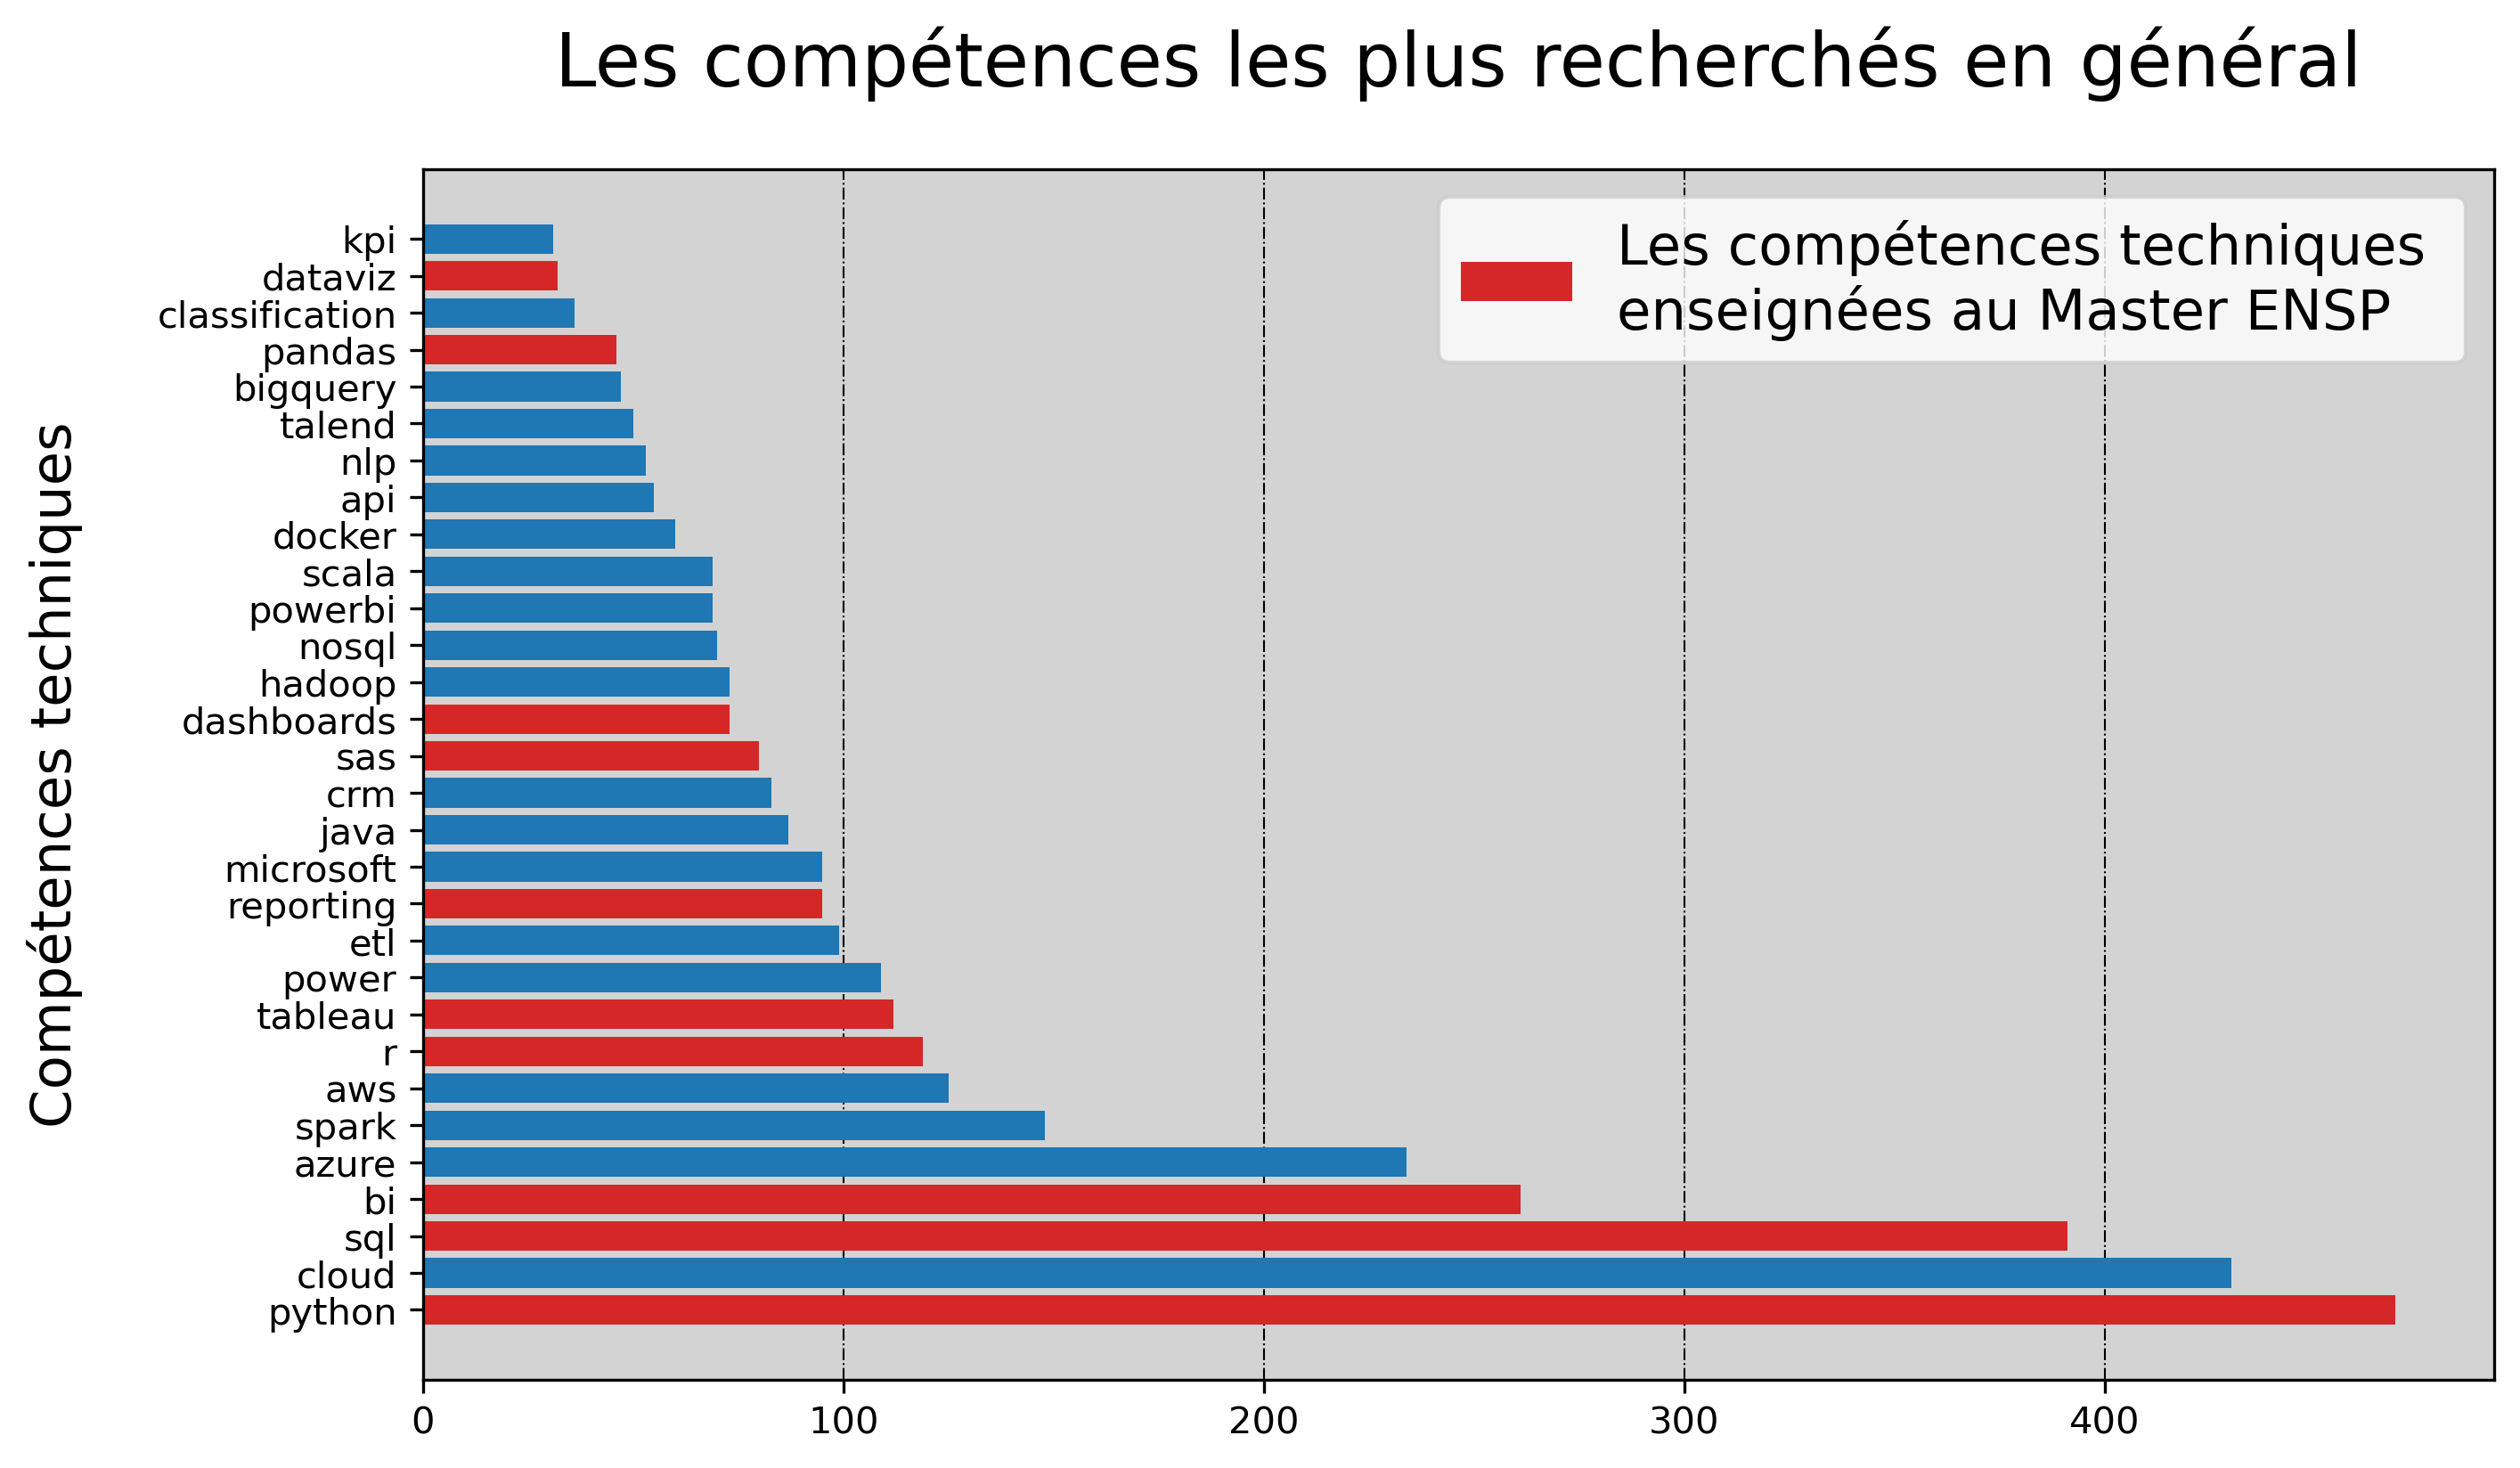

In [435]:
mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('lightgray')
plt.gca().set_axisbelow(True)
red_handles = []
for index,row in BDD_skills_top30[['mot','Total']].iterrows():
    if row['mot'] in ensp_word:
        red_handles.append(plt.barh(row['mot'], row['Total'], color='tab:red', 
                                    label='Les compétences techniques \nenseignées au Master ENSP'))
    else:
        plt.barh(row['mot'], row['Total'], color='tab:blue')
plt.grid(axis='x', which='both', color='black', linestyle='-.', linewidth=0.5)
plt.ylabel('Compétences techniques', fontsize = 15, labelpad=20)
plt.title('Les compétences les plus recherchés en général', y=1.05, fontsize = 20)
plt.legend(handles=red_handles, labels=['Les compétences techniques \nenseignées au Master ENSP'], 
           prop={'size': 15}, loc='best')
plt.savefig("BDD_skills_top255686.png", dpi=400, bbox_inches='tight')
plt.show()

##### Tri décroissant en fonction de compétences techniques les plus recherchées pour le poste Data Analyst

In [407]:
#garder les 30 premieres lignes pour que le graphique soit clair et lisible
data_analyst_top30 = BDD_skills.sort_values(by='Data analyst', ascending=False)
data_analyst_top30 = data_analyst_top30.head(30)

##### visualisation des compétences les plus recherchés pour les data analyst

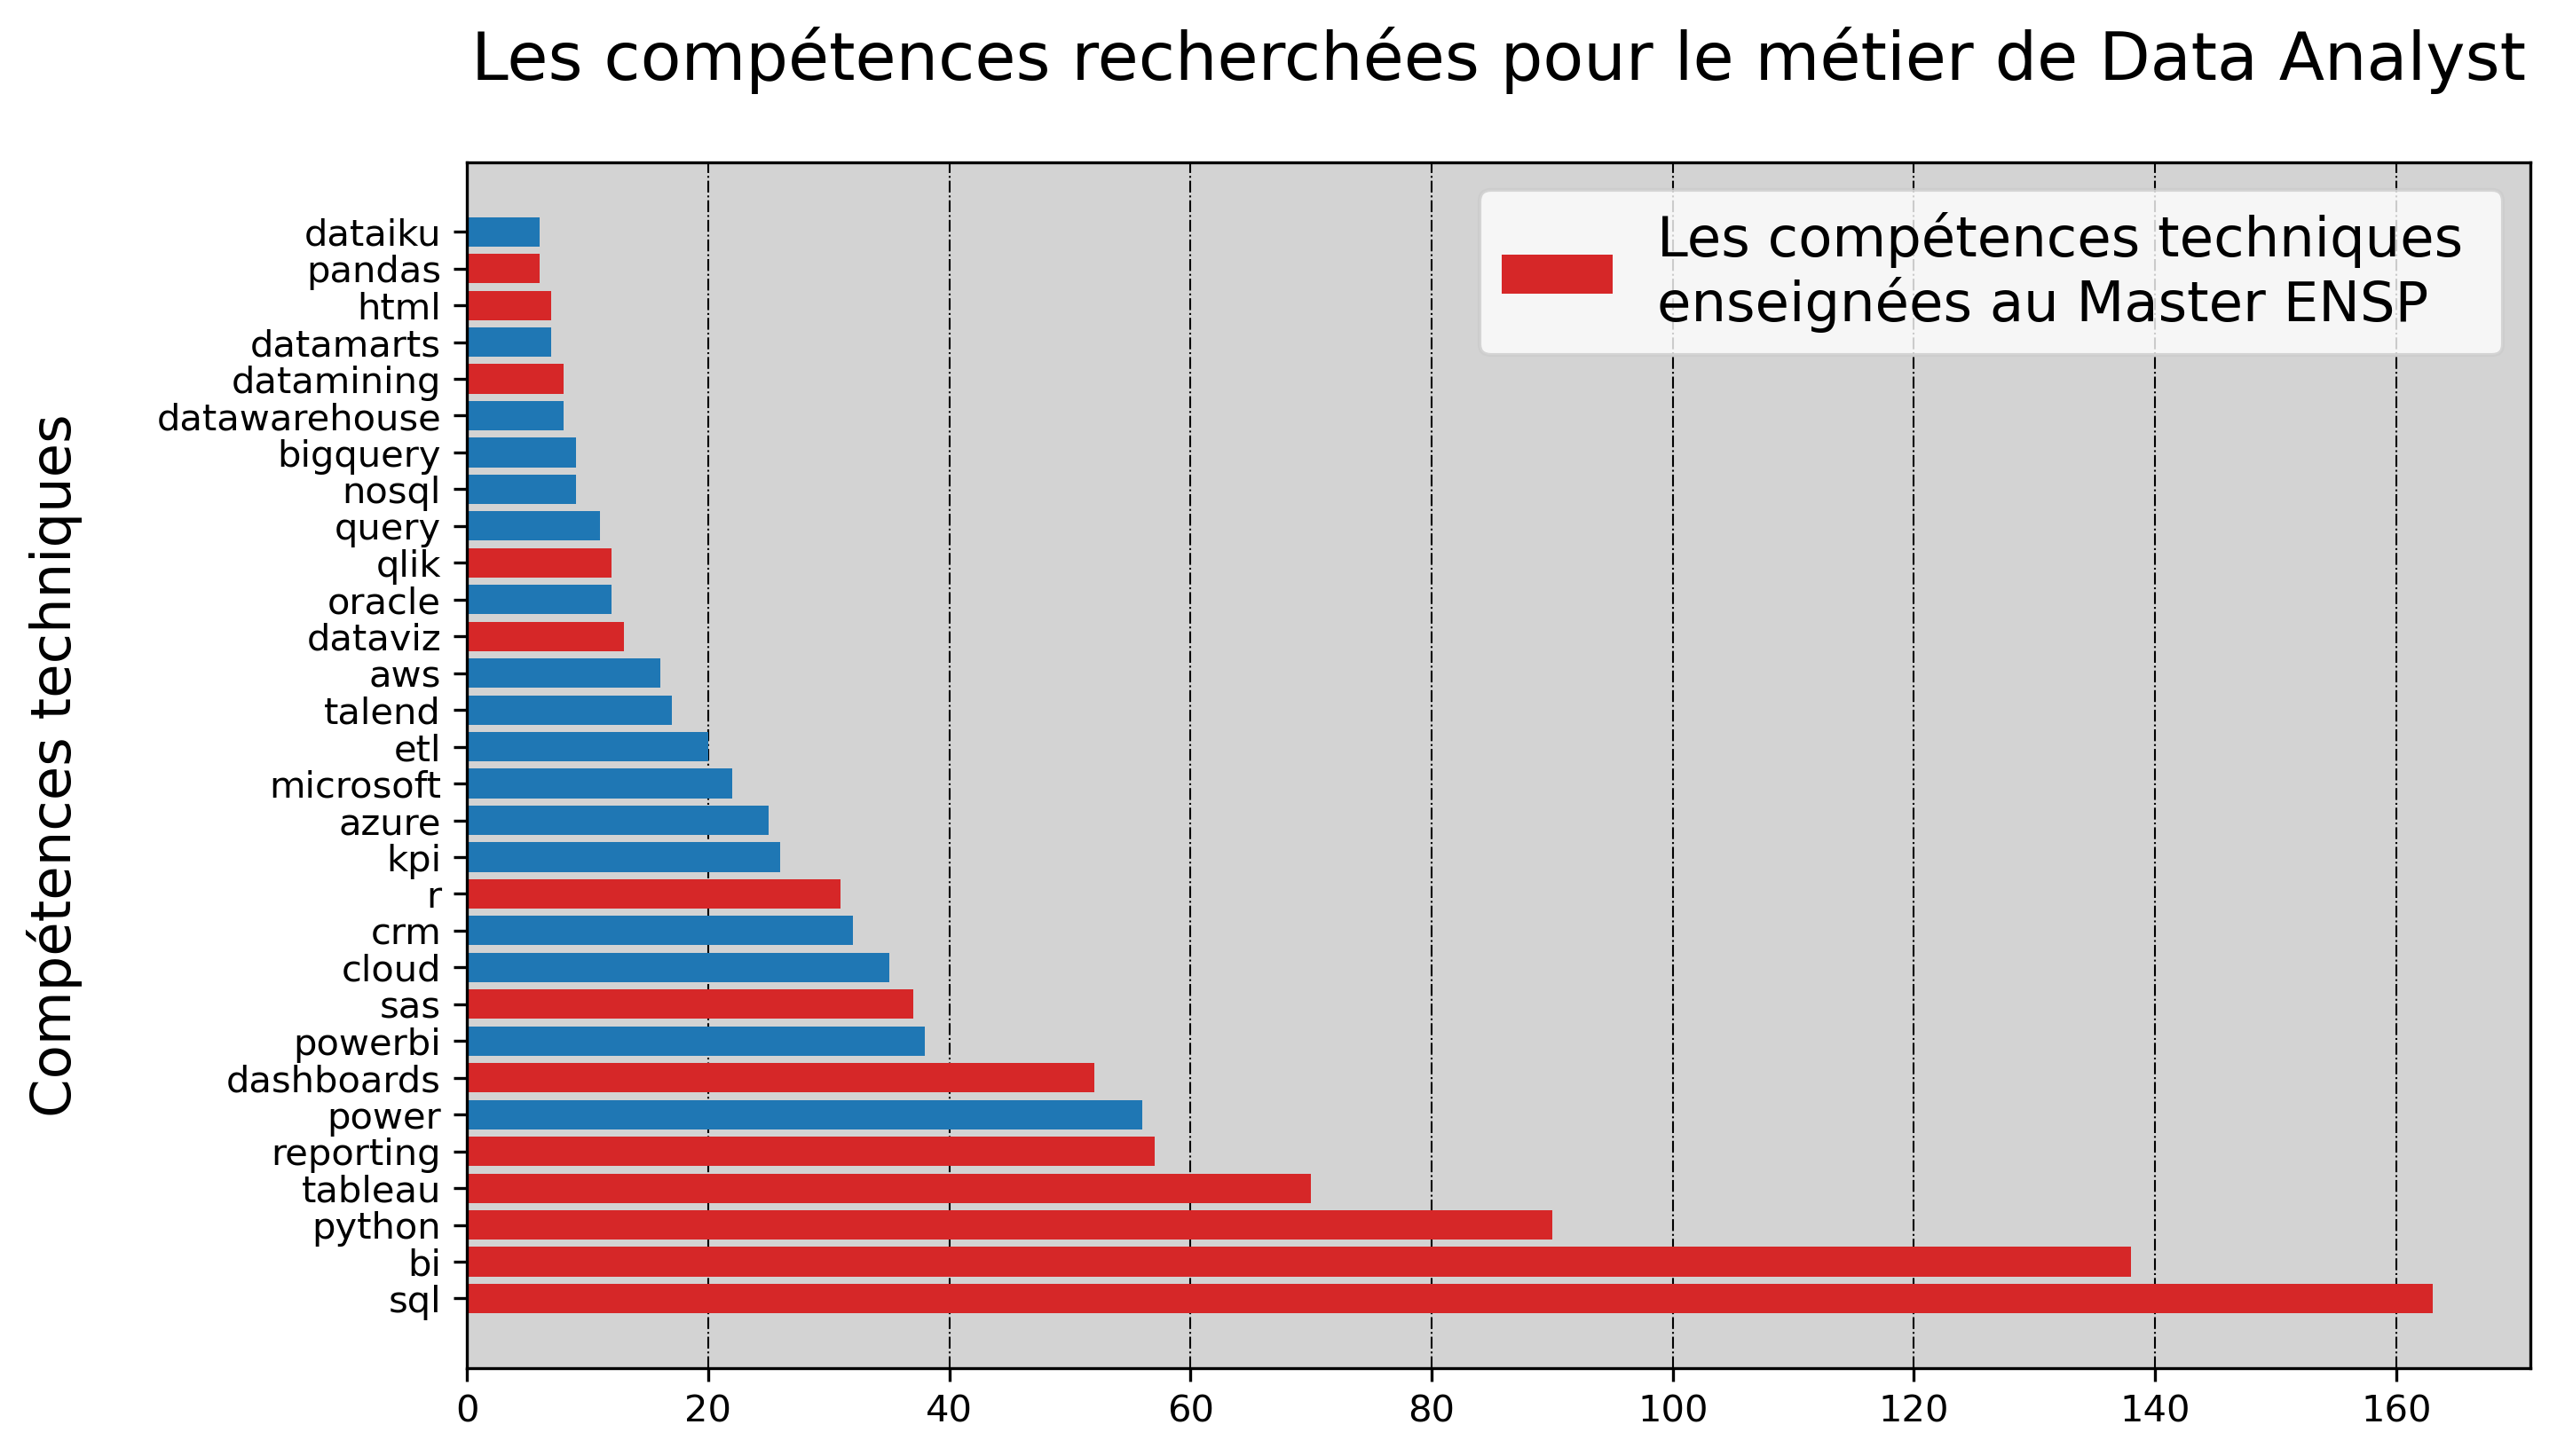

In [408]:
mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('lightgray')
plt.gca().set_axisbelow(True)
red_handles = []
for index,row in data_analyst_top30[['mot','Data analyst']].iterrows():
    if row['mot'] in ensp_word:
        red_handles.append(plt.barh(row['mot'], row['Data analyst'], color='tab:red', 
                                    label='Les compétences techniques \nenseignées au Master ENSP'))
    else:
        plt.barh(row['mot'], row['Data analyst'], color='tab:blue')
plt.grid(axis='x', which='both', color='black', linestyle='-.', linewidth=0.5)
plt.ylabel('Compétences techniques', fontsize = 15, labelpad=20)
plt.title('Les compétences recherchées pour le métier de Data Analyst', y=1.05, fontsize = 18)
plt.legend(handles=red_handles, labels=['Les compétences techniques \nenseignées au Master ENSP'], 
           prop={'size': 15}, loc='best')
plt.savefig("plot data analyst.png", dpi=400, bbox_inches='tight')
plt.show()

##### Tri décroissant en fonction de compétences techniques les plus recherchées pour le poste Data Scientist

In [409]:
#garder les 30 premieres lignes pour que le graphique soit clair et lisible
data_scientist_top30 = BDD_skills.sort_values(by='Data scientist', ascending=False)
data_scientist_top30 = data_scientist_top30.head(30)

##### visualisation des compétences les plus recherchés pour les data scientist

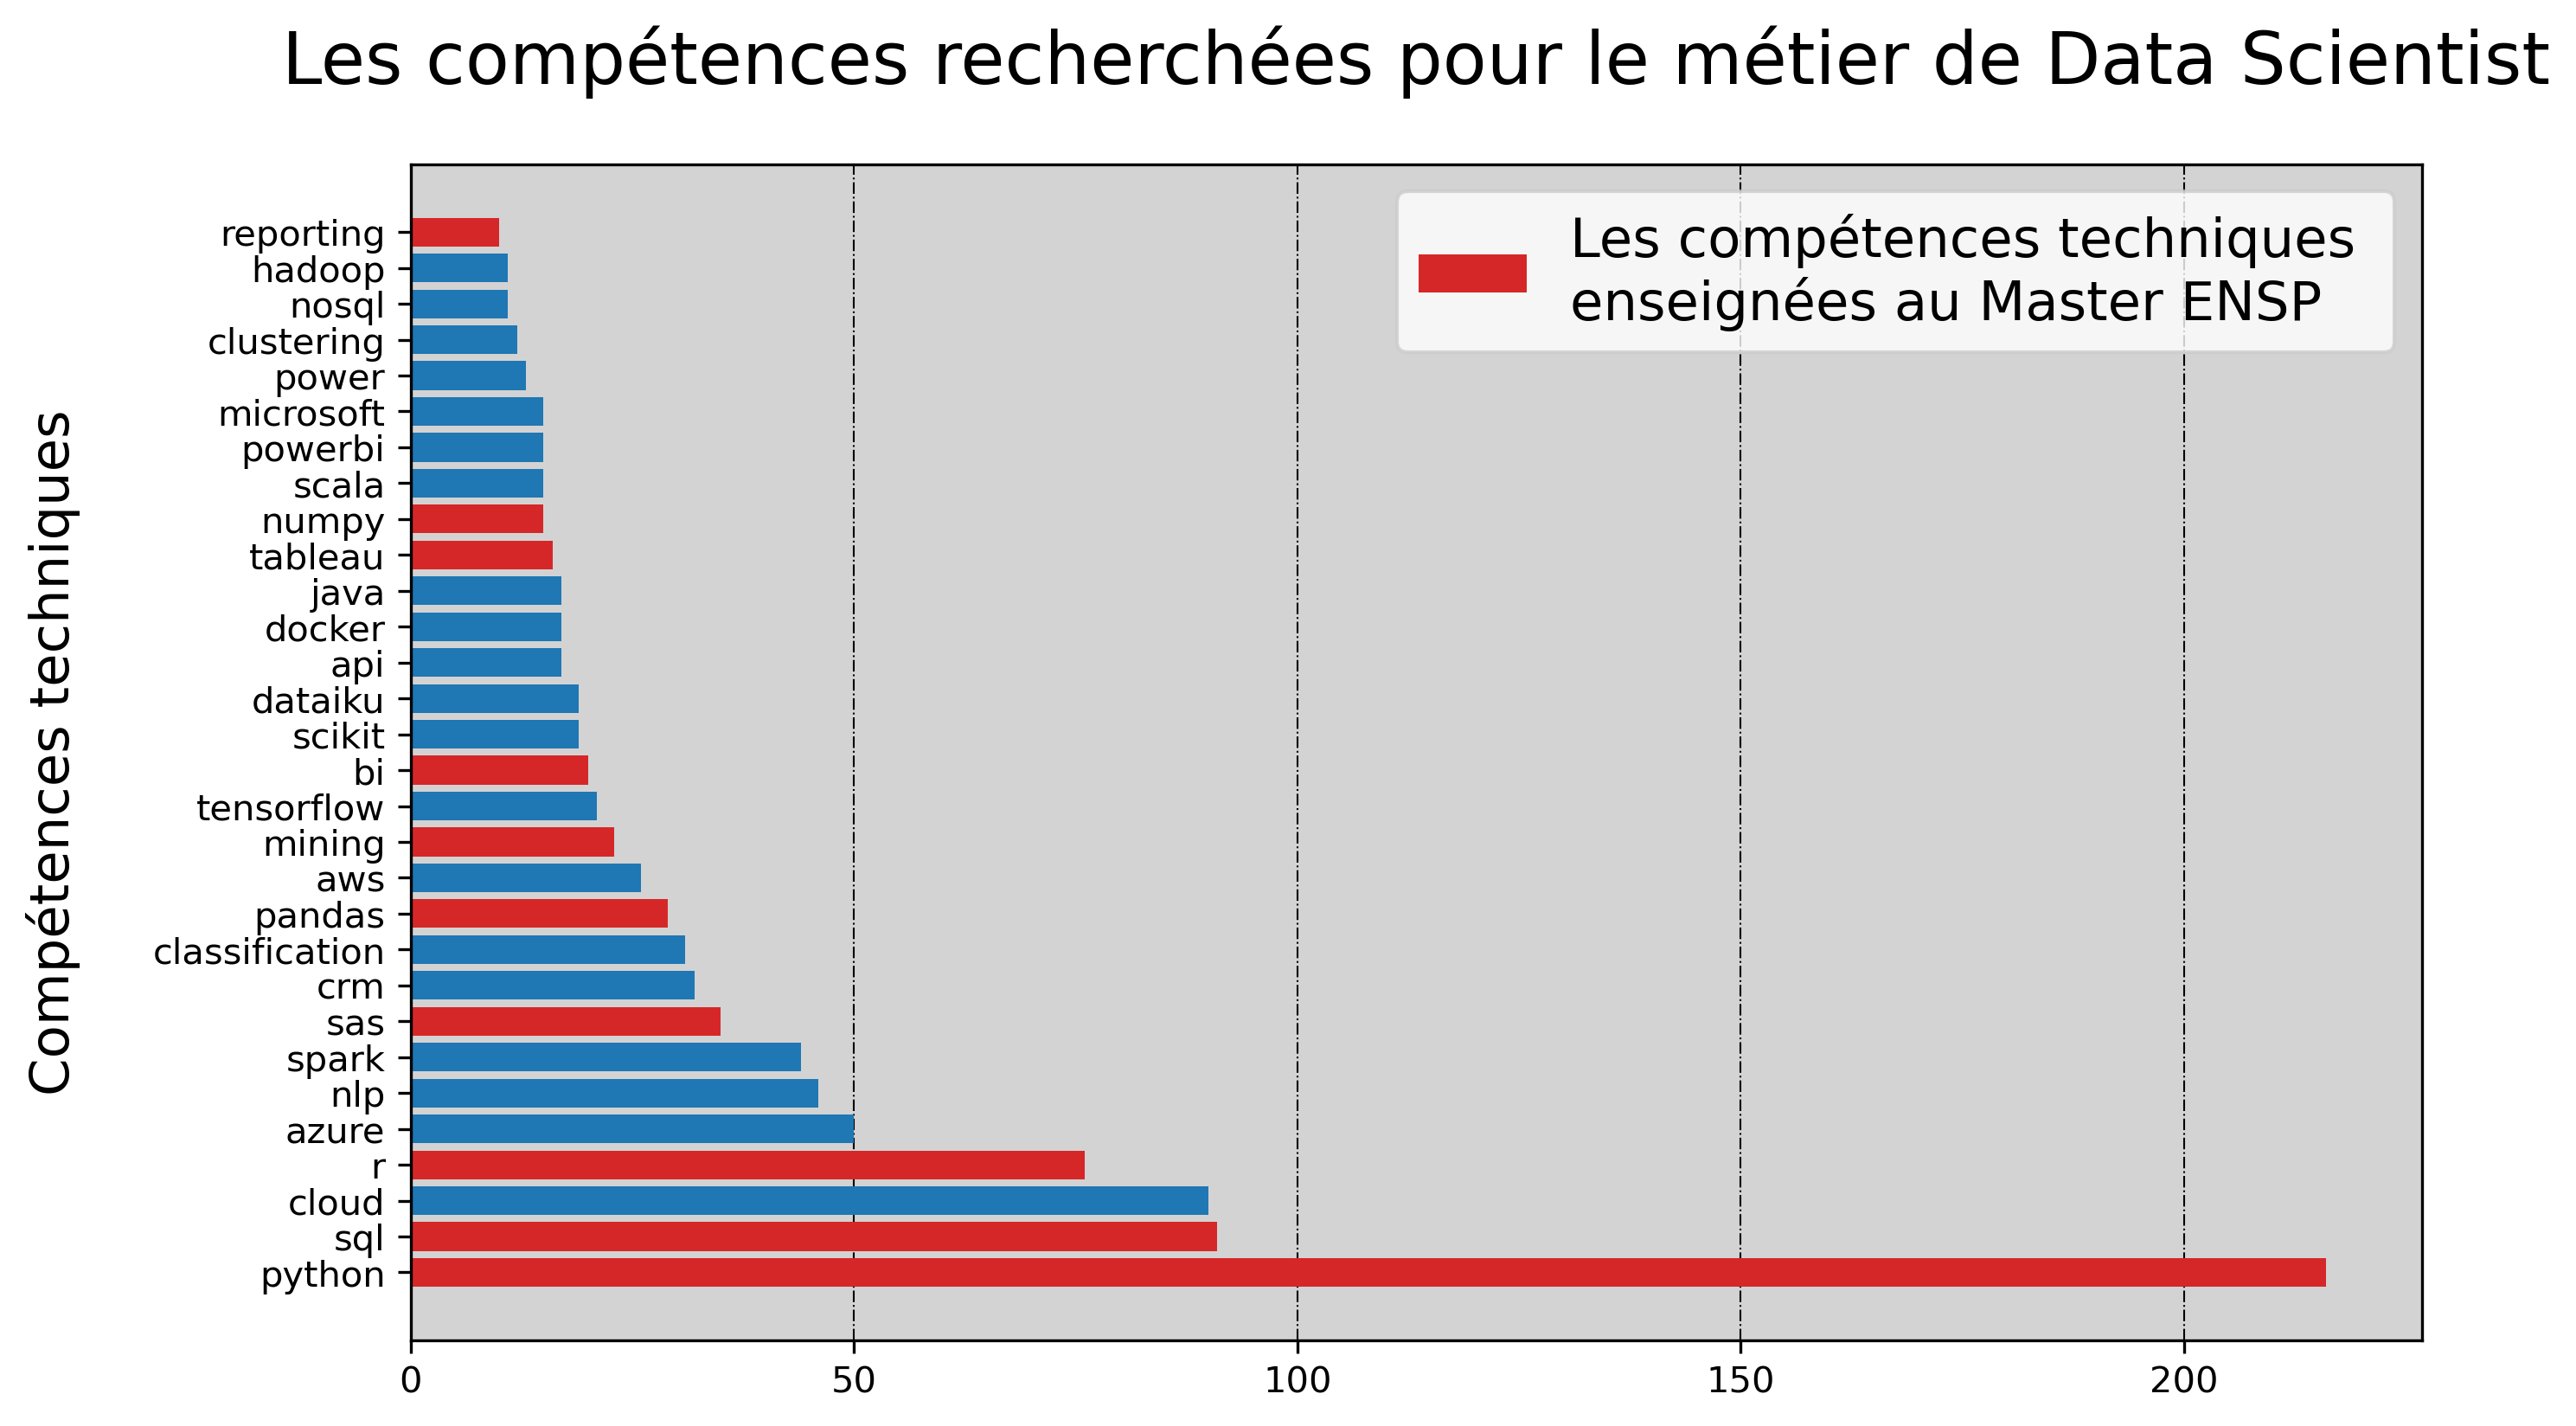

In [410]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('lightgray')
plt.gca().set_axisbelow(True)
red_handles = []
for index,row in data_scientist_top30[['mot','Data scientist']].iterrows():
    if row['mot'] in ensp_word:
        red_handles.append(plt.barh(row['mot'], row['Data scientist'], color='tab:red', 
                                    label='Les compétences techniques \nenseignées au Master ENSP'))
    else:
        plt.barh(row['mot'], row['Data scientist'], color='tab:blue')
plt.grid(axis='x', which='both', color='black', linestyle='-.', linewidth=0.5)
plt.ylabel('Compétences techniques', fontsize = 15, labelpad=20)
plt.title('Les compétences recherchées pour le métier de Data Scientist', y=1.05, fontsize = 20)
plt.legend(handles=red_handles, labels=['Les compétences techniques \nenseignées au Master ENSP'], 
           prop={'size': 15}, loc='best')
plt.savefig("plot data scientist.png", dpi=400, bbox_inches='tight')
plt.show()

##### Tri décroissant en fonction de compétences techniques les plus recherchées pour le poste Data Engineer

In [411]:
data_engineer_top30 = BDD_skills.sort_values(by='Data engineer', ascending=False)
data_engineer_top30 = data_engineer_top30.head(30)

##### visualisation des compétences les plus recherchés pour les data engineer

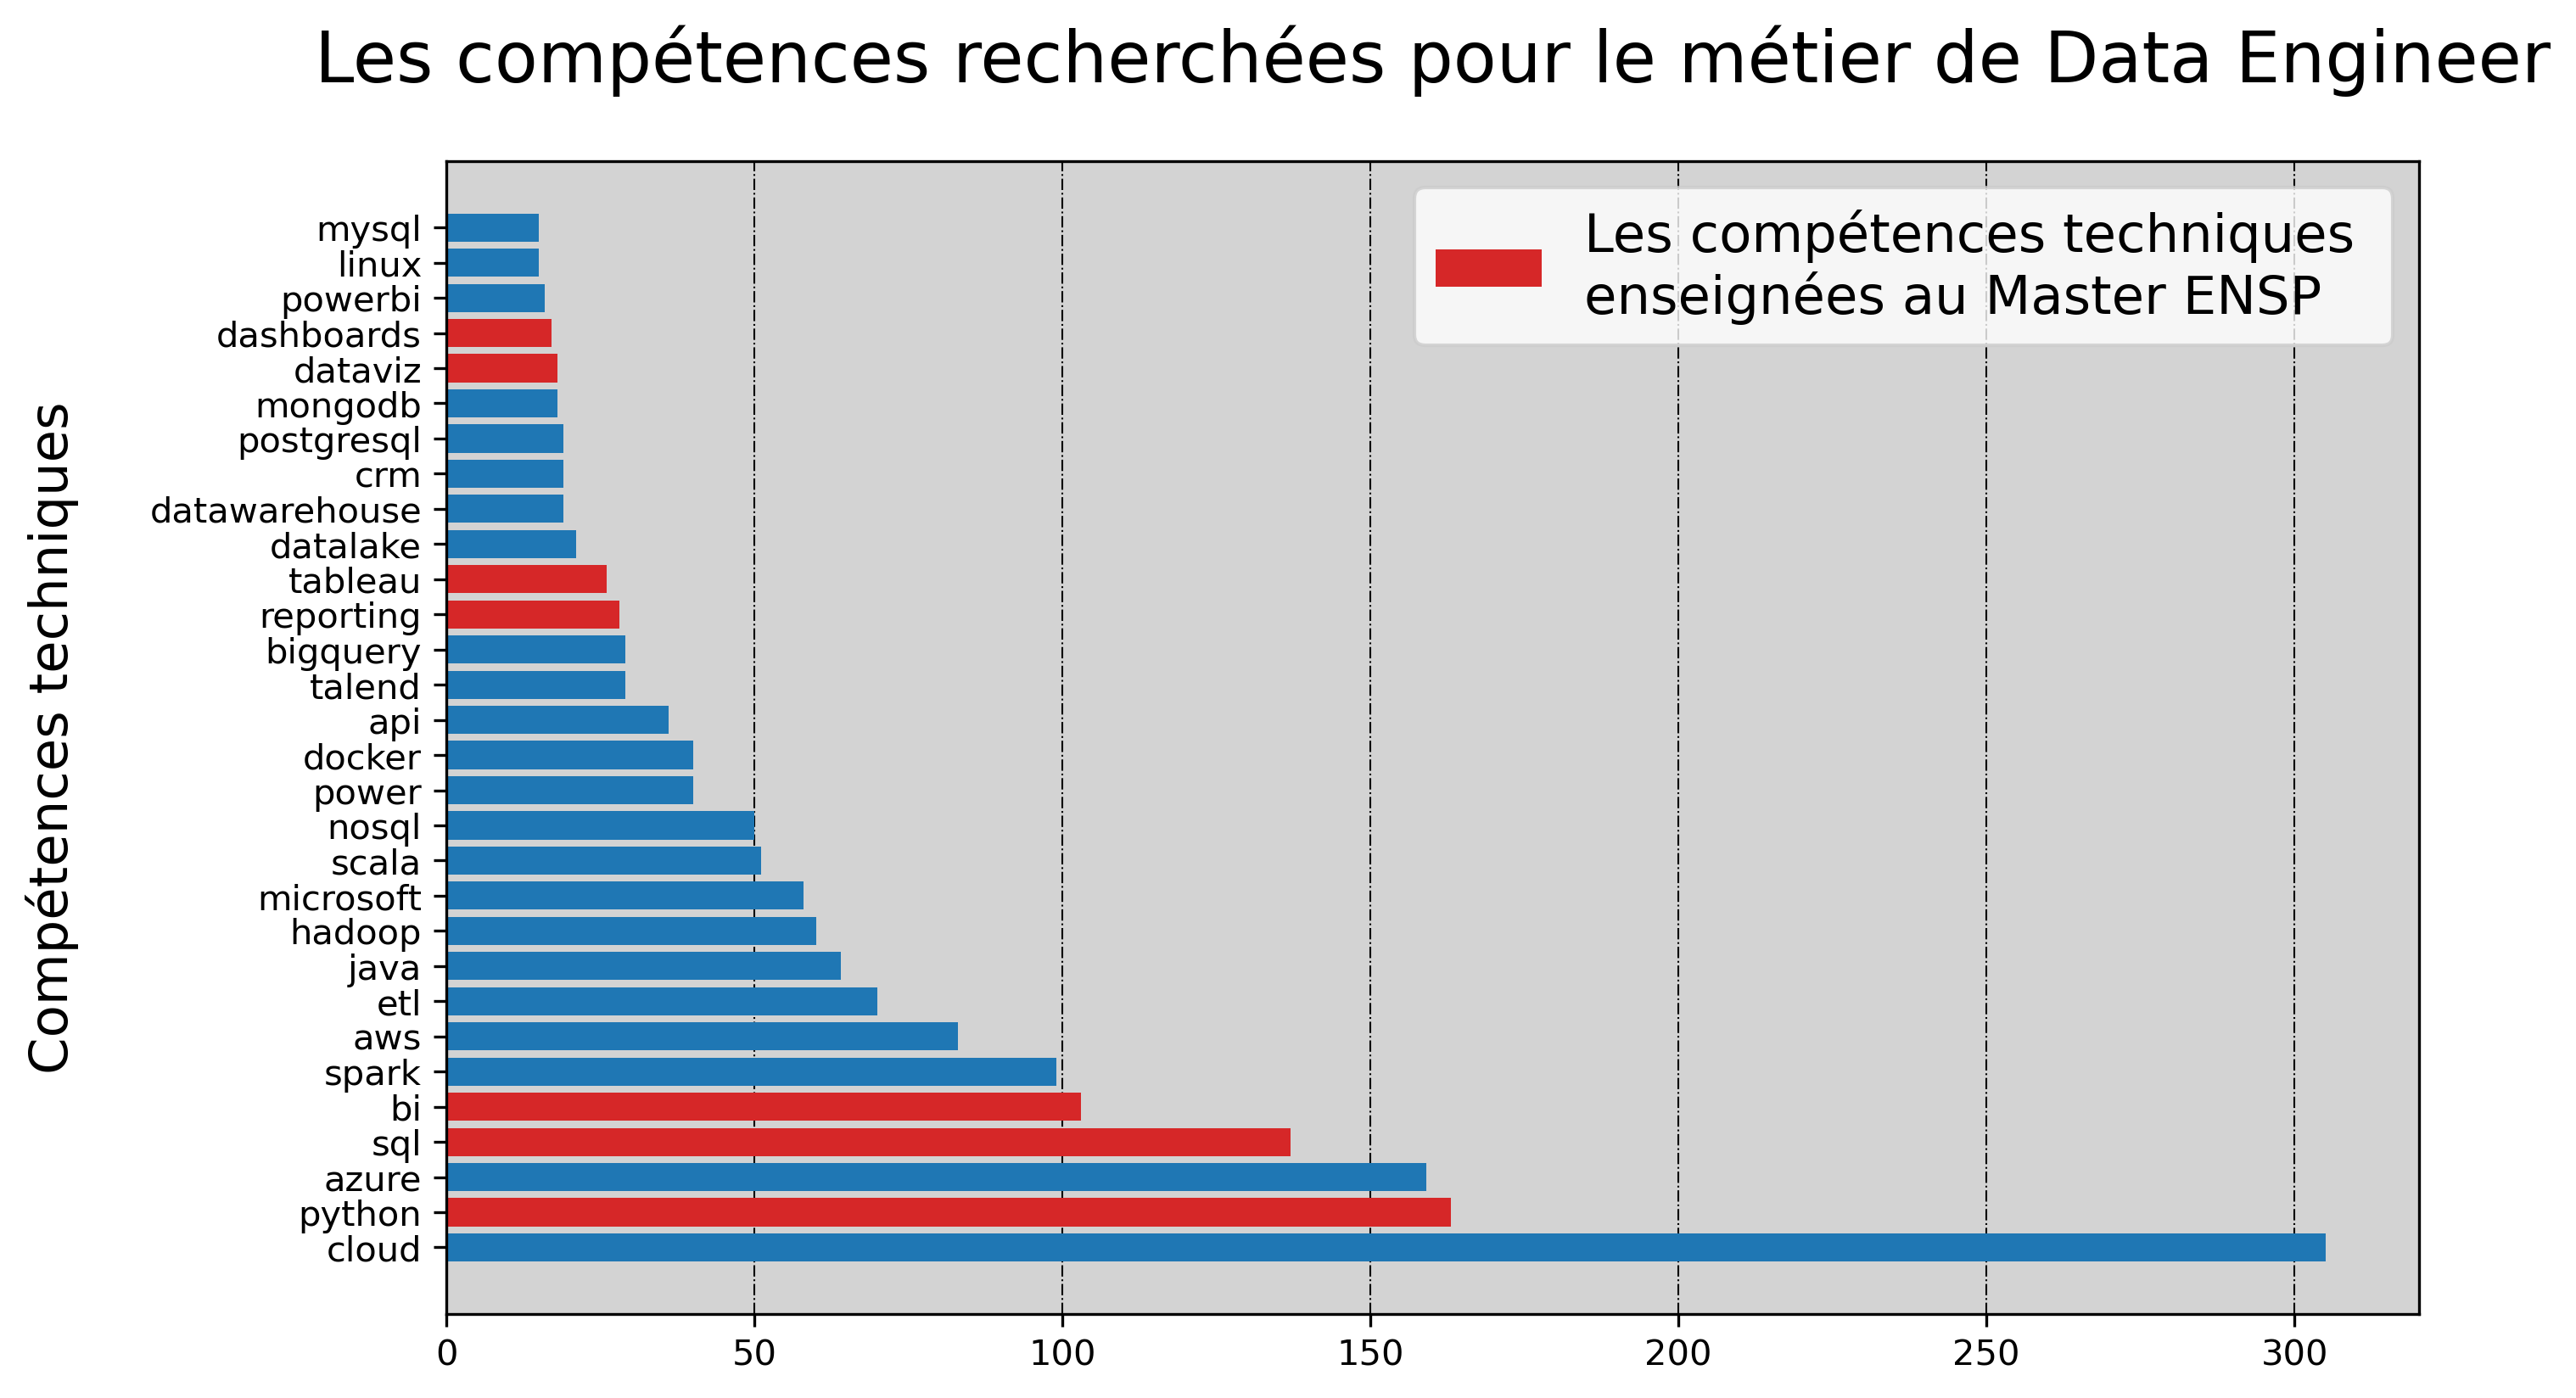

In [413]:
mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('lightgray')
plt.gca().set_axisbelow(True)
red_handles = []
for index,row in data_engineer_top30[['mot','Data engineer']].iterrows():
    if row['mot'] in ensp_word:
        red_handles.append(plt.barh(row['mot'], row['Data engineer'], color='tab:red', 
                                    label='Les compétences techniques \nenseignées au Master ENSP'))
    else:
        plt.barh(row['mot'], row['Data engineer'], color='tab:blue')
plt.grid(axis='x', which='both', color='black', linestyle='-.', linewidth=0.5)
plt.ylabel('Compétences techniques', fontsize = 15, labelpad=20)
plt.title('Les compétences recherchées pour le métier de Data Engineer', y=1.05, fontsize = 20)
plt.legend(handles=red_handles, labels=['Les compétences techniques \nenseignées au Master ENSP'], 
           prop={'size': 15}, loc='best')
plt.savefig("plot data engineer.png", dpi=400, bbox_inches='tight')
plt.show()

### Master ENSP

##### Filter la BDD_skills : Garder uniquement les compétences enseignées au Master ENSP listées déjà dans la liste "ensp_word"

In [105]:
M_ensp = BDD_skills[BDD_skills.mot.isin(ensp_word) == True]
print(M_ensp.shape)
print(len(ensp_word))

(25, 5)
28


#### Tableau de pourcentage

In [106]:
#calculer les pourcentages
M_ensp_percentage = M_ensp.assign(Data_analyst_percentage = lambda x: (x['Data analyst'] / x.Total)*100,
                       Data_scientist_percentage = lambda x: (x['Data scientist'] / x.Total)*100,
                       Data_engineer_percentage = lambda x: (x['Data engineer'] / x.Total)*100)
#arrondir
M_ensp_percentage = M_ensp_percentage.round({'Data_analyst_percentage': 0, 
                                             'Data_scientist_percentage': 0, 
                                             'Data_engineer_percentage': 0})
#garler seulement les colonnes des pourcentages
M_ensp_percentage = M_ensp_percentage[['mot',
                                       'Data_analyst_percentage', 
                                       'Data_scientist_percentage', 
                                       'Data_engineer_percentage']]
#renommer les colonnes
M_ensp_percentage = M_ensp_percentage.rename(columns={'Data_analyst_percentage': 'Data analyst',
                                                      'Data_scientist_percentage':'Data scientist',
                                                      'Data_engineer_percentage':'Data engineer'})
#calcule du total (100%)
M_ensp_percentage = M_ensp_percentage.assign(Total = lambda x: x['Data analyst'] + x['Data scientist'] + x['Data engineer'])
#tri décroissant sur la colonne data analyst
M_ensp_percentage = M_ensp_percentage.sort_values(by='Data analyst', ascending=False)

In [107]:
M_ensp_percentage

,mot,Data analyst,Data scientist,Data engineer,Total
5840,spreadsheet,100.0,0.0,0.0,100.0
4239,datamining,100.0,0.0,0.0,100.0
1547,dashboards,71.0,5.0,23.0,99.0
1739,html,64.0,18.0,18.0,100.0
723,tableau,62.0,14.0,23.0,99.0
719,reporting,60.0,11.0,29.0,100.0
3804,shiny,60.0,20.0,20.0,100.0
1802,css,57.0,29.0,14.0,100.0
211,bi,53.0,8.0,39.0,100.0
928,sas,46.0,44.0,10.0,100.0


##### créer le graphique

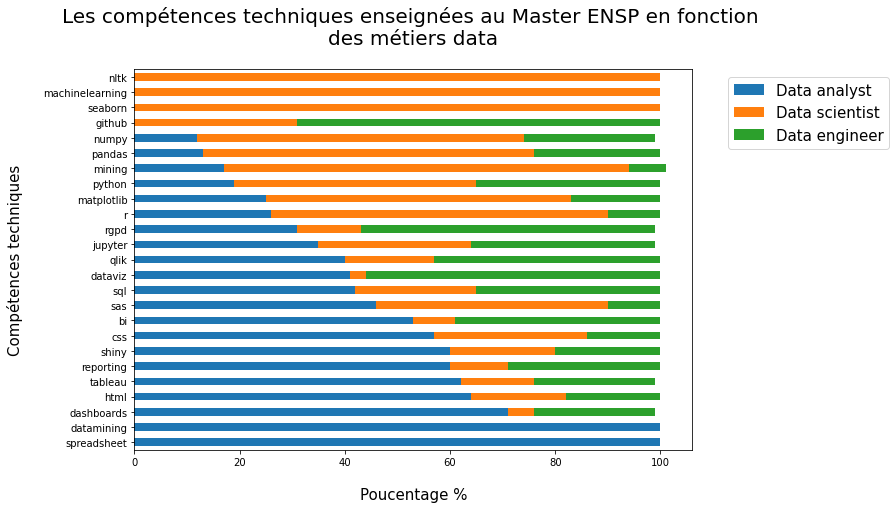

In [114]:
M_ensp_percentage.set_index('mot').loc[:, ['Data analyst', 'Data scientist', 'Data engineer']].plot(kind='barh', 
                                                                                                    stacked=True, 
                                                                                                    figsize=(10,7))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 15})
plt.xlabel('Poucentage %', fontsize = 15, labelpad=20)
plt.ylabel('Compétences techniques', fontsize = 15, labelpad=20)
plt.title('Les compétences techniques enseignées au Master ENSP en fonction \ndes métiers data', y=1.05, fontsize = 20)
plt.savefig("plot ensp.png",dpi=400, bbox_inches='tight')
plt.show()


#### Exportation de la base de données en format excel

In [56]:
BDD_skills.to_excel(r'final result.xlsx')